# MNIST Dataset

### import dataset

In [176]:
import tensorflow as tf
import numpy as np

(x_train , y_train ) , (x_test , y_test) = tf.keras.datasets.mnist.load_data()


1


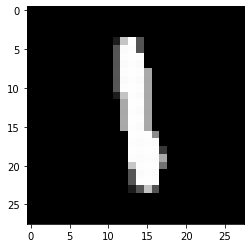

In [171]:
import matplotlib.pyplot as plt

plt.imshow(x_train[200] , cmap='gray')
print(y_train[200])

### vectorization

In [210]:
x_train = np.reshape(x_train , (-1 , 784))
x_test = np.reshape(x_test , (-1 , 784))

x_test.shape

(10000, 784)

### One-hot encoding

In [183]:
y = []

for i in y_train:
  vector_y = np.zeros(10) #tmp variable
  vector_y[i] = 1
  y.append(vector_y)

y = np.array(y)
print(y.shape)

(60000, 10)


# MLP wit MNIST

In [189]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(784))
model.add(tf.keras.layers.Dense(200 , activation='relu'))
model.add(tf.keras.layers.Dense(200 , activation='relu'))
model.add(tf.keras.layers.Dense(10 , activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,
              loss=tf.keras.losses.MeanSquaredError())

In [190]:
model.fit(x_train / 255. , y , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0102
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0050
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0038
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0032
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0027
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0024
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0019
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0018
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0016


In [209]:
predict_y = model.predict(x_test / 255.)

print("accuracy : " + format((np.sum(predict_y.argmax(axis=1) == y_test) / len(y_test) * 100) , ".2f") + " %")

accuracy : 97.73 %
